<div style="text-align: left; font-size: 16px;"
    <div style="text-align: left; display: inline-block; line-height: 2;"
        <ul style="list-style-type: none; padding: 0;"
            <liRMIT UNIVERSITY VIETNAM</li
            <liSchool of Science, Engineering and Technology (SSET)</li
            <liCOSC2753 | COSC2812 - Machine Learning</li
        </ul
    </div
</div

<div style="text-align: center; font-size: 25px; margin-bottom: 5px; margin-top: 0px"
    <strong style="color: yellow;"ASSIGNMENT 1</strong
</div

<div style="text-align: center; font-size: 20px; margin-bottom: -10px"
    <div style="text-align: center; display: inline-block; line-height: 2;"
        <ul style="list-style-type: none; padding: 0;"
            <li<strong Lecture:</strong Mr. Bao Nguyen Thien</li
            <li style="text-align: left; display: inline-block; padding-left: 30px;"
                Nguyen Ha Kieu Anh - S3818552
            </li
           </li
            <li<strong Submission Due Date:</strong 10.04.2025</li
        </ul
    </div
</div


<p style="text-align: center; font-size:16px; margin-left: 20px; line-height: 1.7; margin-top: -5px; margin-right: 30px;"<i"I declare that in submitting all work for this assessment I have read, understood, and agree to the content and expectations of the <a href="https://www.rmit.edu.au/students/my-course/assessment-results/assessment" target="_blank"Assessment declaration</a."</i</p

# <span style="font-weight:bold"> Step 1: Exploratory Data Analysis </span>
---
---

### Importing and setting up the environment

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
import pandas as pd
import os

# Create required folders if they don't exist
os.makedirs("../models", exist_ok=True)
os.makedirs("../metrics", exist_ok=True)

In [25]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

### Visualisation Metrics

In [26]:
def analyze_univariate_feature(df, col):
    """
    Perform univariate analysis for a single feature.
    Displays histogram, boxplot, skewness, kurtosis, outlier count, and descriptive stats.
    """
    sns.set(style="whitegrid")

    # === PLOTS ===
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 2]})
    
    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color='steelblue')
    axes[0].set_title(f"{col} - Histogram", fontsize=12)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f"{col} - Boxplot", fontsize=12)
    axes[1].set_xlabel("")

    plt.suptitle(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # === STATISTICS ===
    data = df[col].dropna()
    sk = skew(data)
    kt = kurtosis(data)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

    # Print everything
    print(f"Distribution of {col}")
    print(f"Skewness: {sk:.2f}")
    print(f"Kurtosis: {kt:.2f}")
    print(f"Number of outliers: {outliers}")

def plot_feature_over_years_by_status(df, feature):
    """
    Plot the trend of a specific feature over the years, grouped by development Status.
    
    Parameters:
    - df: DataFrame containing the data
    - feature: column name (string) of the feature to plot
    """
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x="Year", y=feature, hue="Status", estimator="mean", errorbar=None)
    plt.title(f"{feature} over Years by Status", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel(feature)
    plt.legend(title="Status", labels=["Developing (0)", "Developed (1)"])
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_lowess_relationship(df, x_col, y_col, title=None):
    """
    Visualize the relationship between two numeric features using LOWESS smoothing.

    Parameters:
    - df: pandas DataFrame containing the data
    - x_col: str, the name of the feature column
    - y_col: str, the name of the target column (e.g., TARGET_LifeExpectancy)
    - title: str, optional title for the plot
    """
    plt.figure(figsize=(10, 6))
    
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        lowess=True,
        scatter_kws={"s": 30, "alpha": 0.4},
        line_kws={"color": "orange", "lw": 2}
    )
    
    plt.title(title or f"{x_col} vs. {y_col}", fontsize=14)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

### Intial check

In [27]:
df_test.head()

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,4,120,2014,0,358,348,368,72,8.24,256.122524,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,5,120,2013,0,361,368,354,75,8.06,239.891392,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


In [28]:
df_train.head(5)

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263.0,262,264,62,0.01,...,6.0,8.16,65.0,0.1,654.37,33736494.0,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271.0,278,264,64,0.01,...,58.0,8.18,62.0,0.1,686.22,327582.0,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268.0,246,290,66,0.01,...,62.0,8.13,64.0,0.1,707.55,31731688.0,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272.0,248,296,69,0.01,...,67.0,8.52,67.0,0.1,750.35,3696958.0,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275.0,278,272,71,0.01,...,68.0,7.87,68.0,0.1,71.16,2978599.0,18.2,18.2,0.454,3.082207


 The dataset consists of <span style="font-weight:bold">2071 rows and 24 features</span>, including both health-related and socioeconomic indicators. The target variable that we trying to predict is <code>TARGET_LifeExpectancy</code>. 

## <span style="font-weight:bold"> 1. Descriptive Statistics </span>
Descriptive statistics reveal a broad range and significant variance in key indicators.  

### <span style="font-style:italic"> 1.1. Statistical Summary </span>

In [29]:
print('\n SOME FIRST DATA EXAMPLES')
df_train.head(5)


 SOME FIRST DATA EXAMPLES


,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263.0,262,264,62,0.01,...,6.0,8.16,65.0,0.1,654.37,33736494.0,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271.0,278,264,64,0.01,...,58.0,8.18,62.0,0.1,686.22,327582.0,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268.0,246,290,66,0.01,...,62.0,8.13,64.0,0.1,707.55,31731688.0,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272.0,248,296,69,0.01,...,67.0,8.52,67.0,0.1,750.35,3696958.0,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275.0,278,272,71,0.01,...,68.0,7.87,68.0,0.1,71.16,2978599.0,18.2,18.2,0.454,3.082207


In [30]:
print('\n____________ DATASET INFO ____________')
print(df_train.info())    


____________ DATASET INFO ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2070 non-null   float64
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2067 non-null   float64
 10  PercentageExpenditure         2062 non-null   float64
 11  Measles                       2070 non-null   float64
 12  BMI                   

In [31]:
# Shape of the dataset
print("DATA SHAPE:", df_train.shape)

# Basic statistics summary
print("\n____________SUMMARY STATISTICS____________")
print(df_train.describe())

DATA SHAPE: (2071, 24)

____________SUMMARY STATISTICS____________
                ID  TARGET_LifeExpectancy      Country         Year  \
count  2071.000000            2071.000000  2071.000000  2071.000000   
mean   1036.000000              69.274505    95.360212  2009.518590   
std     597.990524               9.482281    54.861641     4.614147   
min       1.000000              37.300000     0.000000  2002.000000   
25%     518.500000              63.000000    50.000000  2006.000000   
50%    1036.000000              71.200000    94.000000  2010.000000   
75%    1553.500000              76.000000   144.000000  2014.000000   
max    2071.000000              92.700000   192.000000  2017.000000   

            Status  AdultMortality  AdultMortality-Male  \
count  2071.000000      2070.00000          2071.000000   
mean      0.185418       162.82029           161.908257   
std       0.388730       118.89928           119.442235   
min       0.000000         1.00000             0.000000  

>####  <span style="font-size:1em;"></span> **Initial Check**
>The target variable <code>TARGET_LifeExpectancy</code> has a **mean of 69.2 years**, with a minimum of **36.3** and a maximum of **92.4**. This wide range is expected in a globally representative dataset, which includes both developed and developing countries.
>
>Several economic indicators such as <code>GDP</code> and <code>Population</code> show **very high standard deviations** relative to their means. For example, <code>GDP</code> has a mean of around 5000 but a maximum exceeding **47,000**, hinting at large disparities between countries. Similarly, <code>Population</code> ranges from a few thousands to **1.3 billion**, suggesting potential skewness or outliers — to be further investigated later.
>
>Features like <code>Schooling</code> and <code>IncomeCompositionOfResources</code> include **minimum values of zero**, which may be data errors or placeholders — especially when paired with non-zero values in related columns. These will be reviewed more critically in later sections.
> 
> Other noticable findings:
>- The <code>BMI</code> mean is approximately **19.5**, slightly below the WHO-recommended healthy range (18.5–24.9).  
>- <code>AdultMortality</code> shows a wide range from **1.0 to 700+**, which may reflect extreme healthcare differences across regions.  
>- Preventative indicators like <code>Polio</code> and <code>Diphtheria</code> have medians above 80%, suggesting that many countries have decent immunization coverage.
> 
>Based on the observed ranges, variables like <code>GDP</code>, <code>Population</code>, and <code>HIV-AIDS</code> show **extreme value spreads**, which could benefit from log-transformation to reduce skew and improve model interpretability.

This statistical overview confirms that the dataset contains highly heterogeneous country profiles, which align with real-world expectations. However, it also reveals potential anomalies, data quality issues, and scaling inconsistencies.


### <span style="font-style:italic"> 1.2. Indentifying the data types </span>


<table border="1" cellpadding="6" cellspacing="0" style="margin-left:auto; margin-right:auto;">
  <tr>
    <th colspan="4" style="text-align:center;"><strong>DATA TYPES SUMMARY</strong></th>
  </tr>
  <tr>
    <td>ID</td>
    <td>Row index (not an attribute)</td>
    <td>Identifier</td>
  </tr>

  <tr>
    <th colspan="4" style="text-align:center;"><strong>Target Variable</strong></th>
  </tr>
  <tr>
    <td>TARGET_LifeExpectancy</td>
    <td>Life Expectancy in age (years)</td>
    <td>Numerical (Target)</td>
  </tr>

  <tr>
    <th colspan="4" style="text-align:center;"><strong>Geographical & Temporal Context</strong></th>
  </tr>
  <tr>
    <td>Country</td>
    <td>Encoded country index</td>
    <td>Categorical (Encoded)</td>
  </tr>
  <tr>
    <td>Year</td>
    <td>Year of the record</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Status</td>
    <td>Country development status (1 = Developed, 0 = Developing)</td>
    <td>Categorical (Binary)</td>
  </tr>

  <tr>
    <th colspan="4" style="text-align:center;"><strong>Mortality & Health Outcomes</strong></th>
  </tr>
  <tr>
    <td>AdultMortality</td>
    <td>Adult mortality rate (both sexes, age 15–60, per 1000)</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>AdultMortality-Female</td>
    <td>Female-specific adult mortality rate</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>AdultMortality-Male</td>
    <td>Male-specific adult mortality rate</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Under5LS</td>
    <td>Under-5 short life spans per 1000 population</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>SLS</td>
    <td>Short life spans per 1000 population</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>HIV-AIDS</td>
    <td>HIV/AIDS-related early deaths per 1000</td>
    <td>Numerical</td>
  </tr>

  <tr>
    <th colspan="4" style="text-align:center;"><strong>Health Behavior & Access</strong></th>
  </tr>
  <tr>
    <td>Alcohol</td>
    <td>Per capita alcohol consumption (litres/year)</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>Body Mass Index</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Thinness1-19years</td>
    <td>Prevalence of thinness (ages 10–19)</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Thinness5-9years</td>
    <td>Prevalence of thinness (ages 5–9)</td>
    <td>Numerical</td>
  </tr>

  <tr>
    <th colspan="4" style="text-align:center;"><strong>Health Infrastructure</strong></th>
  </tr>
  <tr>
    <td>Polio</td>
    <td>Immunization coverage among 1-year-olds</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Diphtheria</td>
    <td>DTP3 immunization coverage</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Measles</td>
    <td>Reported measles cases per 1000</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>TotalExpenditure</td>
    <td>Government health spending (% of total)</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>PercentageExpenditure</td>
    <td>Health expenditure as % of GDP</td>
    <td>Numerical</td>
  </tr>

  <tr>
    <th colspan="4" style="text-align:center;"><strong>Socioeconomic Indicators</strong></th>
  </tr>
  <tr>
    <td>GDP</td>
    <td>Gross Domestic Product per capita (USD)</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>Population</td>
    <td>Total national population</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>IncomeCompositionOfResources</td>
    <td>HDI Income Index (0–1)</td>
    <td>Numerical (Index)</td>
  </tr>
  <tr>
    <td>Schooling</td>
    <td>Average years of schooling</td>
    <td>Numerical</td>
  </tr>
</table>



### <span style="font-style:italic"> 1.3. Identifying missing values </span>


In [32]:
# Total rows
missing_summary = pd.DataFrame({
    'Missing Count': df_train.isna().sum(),
    'Missing Percentage (%)': (df_train.isna().sum() / df_train.shape[0]) * 100
}).round(2)

# Show only features with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
missing_summary

,Missing Count,Missing Percentage (%)
AdultMortality,1,0.05
Alcohol,4,0.19
PercentageExpenditure,9,0.43
Measles,1,0.05
BMI,8,0.39
Under5LS,1,0.05
Polio,1,0.05
TotalExpenditure,10,0.48
HIV-AIDS,3,0.14
GDP,9,0.43


><span style="font-size:1em;"></span>  **Observation:**  
>- The following features contain missing values: <code>BMI</code>, <code>GDP</code>, <code>Schooling</code>, <code>Alcohol</code>, <code>TotalExpenditure</code>, <code>Population</code>, <code>IncomeCompositionOfResources</code>, <code>AdultMortality</code>, etc.  
>- All of them are <span style="font-weight:bold">numerical</span> features.  
>- No <span style="font-weight:bold">categorical</span> features (<code>Country</code>, <code>Status</code>) have missing data, so there is <span style="font-style:italic">no need to use mode</span> imputation.  
>- The missing rate is very low (less than 0.5%), suggesting that these gaps are unlikely to introduce significant bias.

<span style="font-weight:bold">Special attention:</span> <code>AdultMortality</code> has only one missing value, but since it’s a key predictor of life expectancy, it’s still important to impute it carefully. For now, I decided to simply remove rows with missing values and will later test other strategies like median and mean.


## <span style="font-weight:bold"> 2. Relationships Between Variables </span>

<span style="font-size:1em;"> </span> Objective:
In this section, I aim to understand how different features relate to the target variable <code>TARGET_LifeExpectancy</code> and among each other. Understanding these relationships can guide feature selection and inform model design later in the pipeline.

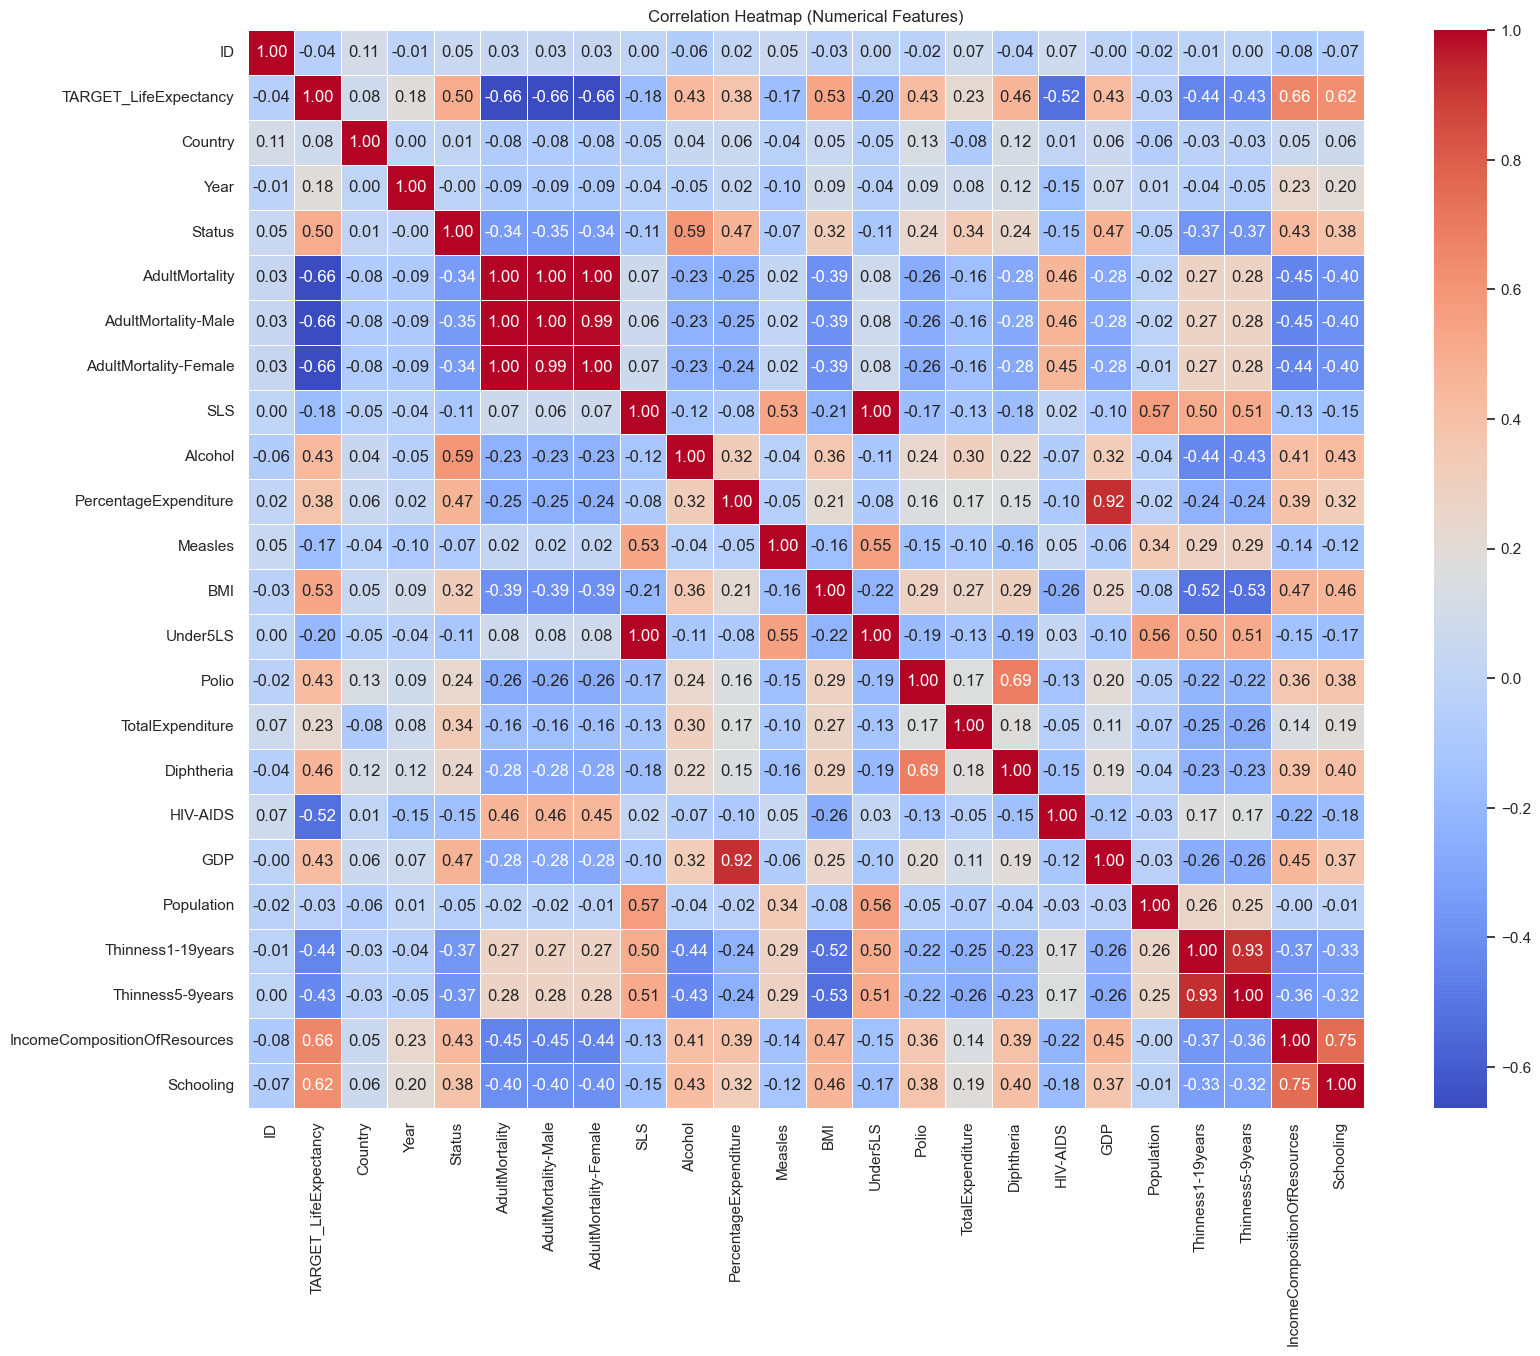

In [33]:
plt.figure(figsize=(18,14))
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


In [34]:
corr = df_train.corr()['TARGET_LifeExpectancy'].sort_values(ascending = False)
corr

TARGET_LifeExpectancy           1.000000
IncomeCompositionOfResources    0.659741
Schooling                       0.624063
BMI                             0.531797
Status                          0.504971
Diphtheria                      0.457555
Alcohol                         0.432934
GDP                             0.428029
Polio                           0.425999
PercentageExpenditure           0.378302
TotalExpenditure                0.226311
Year                            0.181780
Country                         0.080722
Population                     -0.029263
ID                             -0.040947
Measles                        -0.168535
SLS                            -0.179600
Under5LS                       -0.201282
Thinness5-9years               -0.428675
Thinness1-19years              -0.436328
HIV-AIDS                       -0.521960
AdultMortality-Female          -0.661136
AdultMortality-Male            -0.662934
AdultMortality                 -0.663438
Name: TARGET_Lif

### *Feature Associations with Life Expectancy*

The correlation matrix reveals that several features are closely associated with `TARGET_LifeExpectancy`. These variables are identified as core contributors to modeling and will be prioritized accordingly.

`IncomeCompositionOfResources` shows the strongest positive correlation with life expectancy (≈ 0.73), followed by `Schooling` (≈ 0.66). These two variables will be treated as essential predictors due to their consistent linear association with the target.

On the negative side, `AdultMortality` (≈ -0.69) and `HIV/AIDS` (≈ -0.56) present the most substantial inverse correlations, indicating their strong explanatory power in predicting lower life expectancy levels. These will also be retained and emphasized during model training.

Moderately correlated features such as `Status`, `BMI`, and `Diphtheria` (≈ 0.47–0.48) are also included in the modeling scope, particularly for non-linear models like Random Forest or XGBoost, which can effectively capture interaction terms and weak signals.

### *Multicollinearity & Feature Redundancy*

Several features exhibit high intercorrelation, leading to potential redundancy. To reduce multicollinearity and improve model generalization, the following decisions are made:

- `Under5Deaths` and `InfantDeaths` are perfectly correlated (r = 1.00). I will remove one — specifically `Under5Deaths` — to eliminate duplication.

- `Thinness1-19Years` and `Thinness5-9Years` have a strong correlation (≈ 0.88), indicating overlapping semantics. These will be merged into a new derived feature representing overall thinness.

- `GDP` and `PercentageExpenditure` are strongly correlated (≈ 0.92). I will retain only `GDP` and drop `PercentageExpenditure` due to its lower direct relevance to the modeling target and high redundancy.

- `Schooling` and `IncomeCompositionOfResources` are correlated (≈ 0.73), forming a socio-economic pair. Both will be retained initially but subject to feature selection or regularization in linear modeling contexts.

- `AdultMaleMortality` and `AdultFemaleMortality` are near-perfectly correlated with `AdultMortality`. To prevent redundancy, I will drop both gender-specific columns and retain only `AdultMortality` as the representative feature.

### *Other Notable Feature Clusters*

- `Polio` and `Diphtheria` are strongly correlated (≈ 0.69), suggesting similar health system factors (e.g., immunization coverage). I will keep both unless further modeling reveals redundancy.

- `Measles` is weakly correlated with both `Polio` and `Diphtheria` (≈ -0.15 to -0.16) and with the target variable. Due to low contribution and weak cluster fit, `Measles` will be dropped.

- `Status` correlates moderately with both `PercentageExpenditure` (≈ 0.47) and `Alcohol` (≈ 0.59), indicating that it encodes broader economic and behavioral patterns. I will retain it and apply proper encoding.


>  #### <span> Based on the exploratory analysis above, I summarize my feature handling decisions as follows:</span>

#### <span style="color:blue"> **Features to Drop (due to redundancy, weak correlation, or irrelevance)** </span>

| Feature                     | Reason for Removal                                                              |
|----------------------------|----------------------------------------------------------------------------------|
| `ID`                       | Identifier column, has no predictive value                                      |
| `Country`                  | Encoded as a number without meaning; better replaced with region/grouping later |
| `SLS`                 | Perfectly correlated with `Under5LS`; `Under5LS` is more important and retained                                                 |
| `Thinness5-9Years`         | Highly correlated with `Thinness1-19Years`, merged into single feature          |
| `AdultMaleMortality`       | Highly correlated with `AdultMortality`, offers no additional insight           |
| `AdultFemaleMortality`     | Same as above                                                                    |
| `Measles`                  | Weakly correlated with target and other immunization features                   |
| `PercentageExpenditure`                  | Highly correlated with `Population`, `Population` is more important and retained                        |


#### <span style="color:blue"> **Features Retained for Modeling** </span>
| Feature                       | Rationale                                                                 |
|------------------------------|---------------------------------------------------------------------------|
| `TARGET_LifeExpectancy`      | Target variable to be predicted                                           |
| `Year`                       | Represents temporal trend, may help capture changes over time             |
| `Status`                     | Development category (0 = Developing, 1 = Developed)                      |
| `BMI`                        | Public health indicator; moderately correlated with target                |
| `Diphtheria`                 | Immunization feature; moderately predictive and interpretable             |
| `Polio`                      | Another immunization variable; complements `Diphtheria`                   |
| `Alcohol`                    | Socio-behavioral feature; correlates with both `Status` and target        |
| `GDP`                        | Strong economic signal; retained for explainability                       |
| `TotalExpenditure`           | Government spending on health; informative even with economic overlap     |
| `Under5LS`                   | Selected via feature importance; strong proxy for child health burden     |
| `Thinness1-19years`          | Nutrition-related feature; moderately predictive                          |
| `IncomeCompositionOfResources` | Highest correlation with target; reflects access to income/services        |
| `Schooling`                  | Strongly related to HDI and life expectancy                               |
| `AdultMortality`             | Strong negative predictor; closely linked with public health outcomes      |
| `HIV-AIDS`                   | Significant health burden indicator; highly predictive of target           |

> <span style="font-weight:bold">Note:</span> Based on the insights derived in the EDA above, feature handling decisions such as dropping, combining, or transforming columns will be finalized in the Data Preprocessing section. All features are retained here for full exploration and justification.


## <span style="font-weight:bold"> 3. Data Distribution </span>




### <span style="font-style:italic"> 3.1 Univariate Analysis </span>
This section examines the **individual distribution of key numerical variables** to understand their range, skewness, presence of outliers, and general shape. Features were selected based on correlation strength or domain importance. Histogram and boxplot visualizations were used for interpretation.

#### <span> 3.1.1 Numerical Data</span>


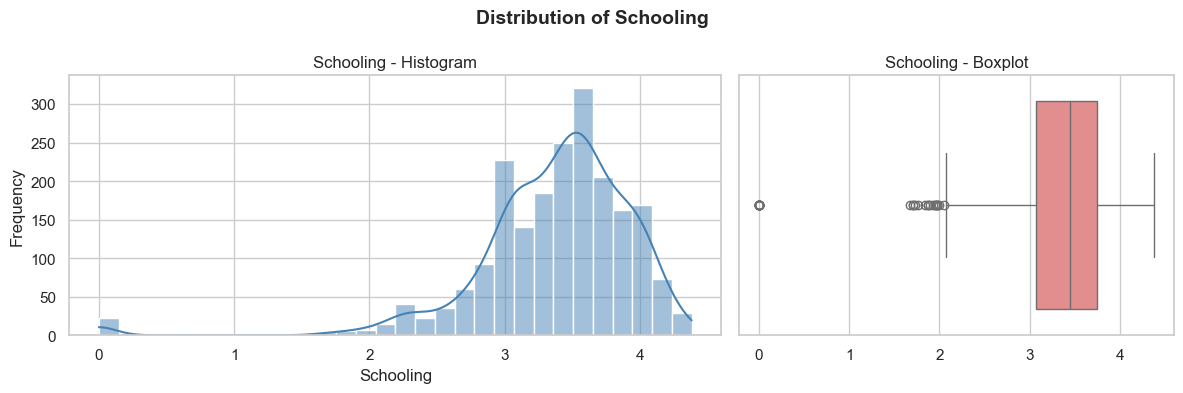

Distribution of Schooling
Skewness: -2.27
Kurtosis: 10.15
Number of outliers: 40

Descriptive Statistics for Schooling
count    2064.000000
mean        3.372332
std         0.590975
min         0.000000
25%         3.065942
50%         3.449638
75%         3.741657
max         4.381780
Name: Schooling, dtype: float64


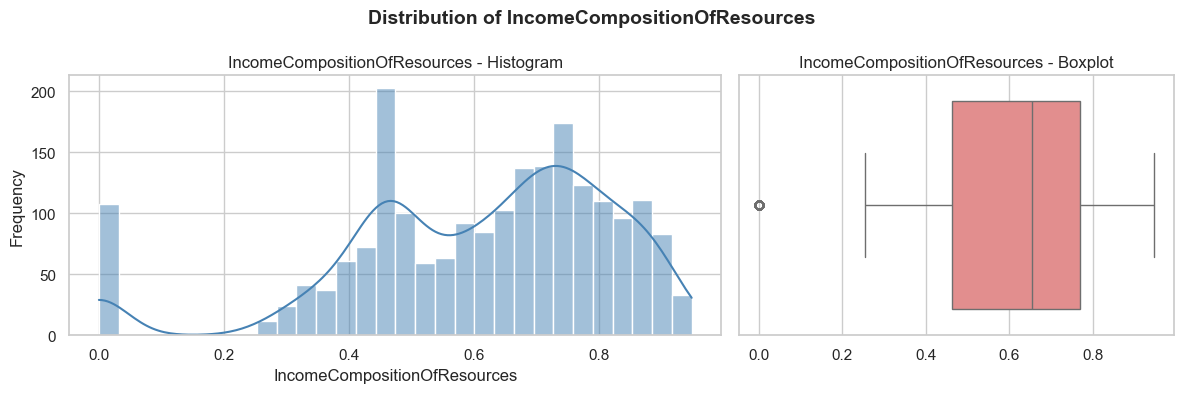

Distribution of IncomeCompositionOfResources
Skewness: -1.00
Kurtosis: 0.97
Number of outliers: 108

Descriptive Statistics for IncomeCompositionOfResources
count    2066.000000
mean        0.609866
std         0.216610
min         0.000000
25%         0.463000
50%         0.655500
75%         0.770000
max         0.948000
Name: IncomeCompositionOfResources, dtype: float64


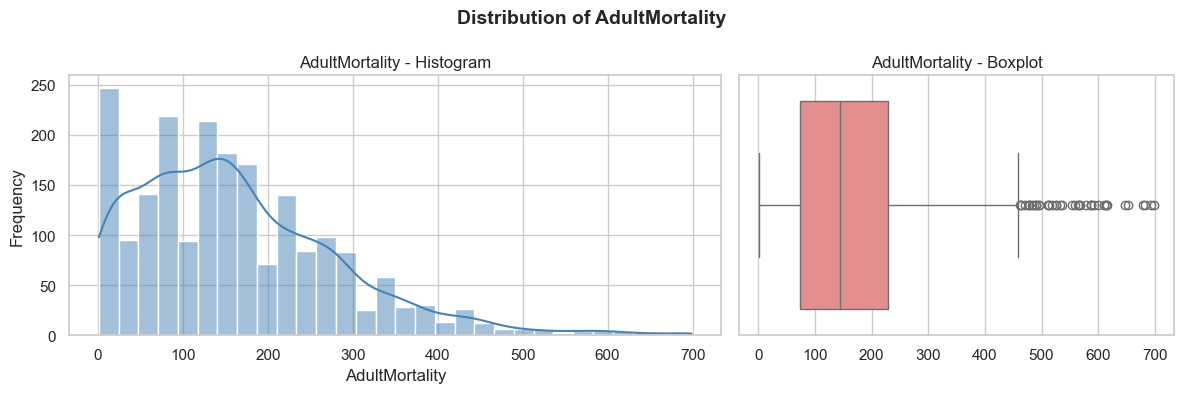

Distribution of AdultMortality
Skewness: 1.06
Kurtosis: 1.42
Number of outliers: 42

Descriptive Statistics for AdultMortality
count    2070.00000
mean      162.82029
std       118.89928
min         1.00000
25%        74.00000
50%       144.00000
75%       228.00000
max       699.00000
Name: AdultMortality, dtype: float64


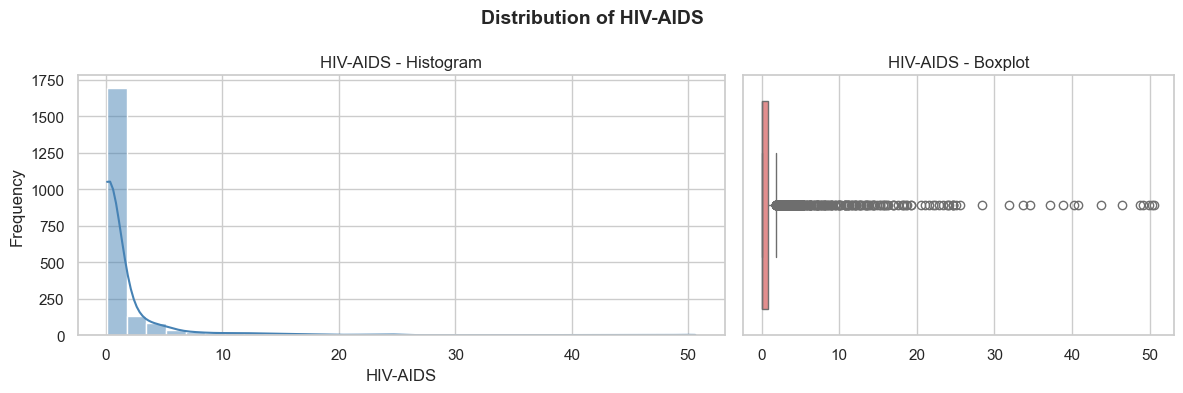

Distribution of HIV-AIDS
Skewness: 5.91
Kurtosis: 43.95
Number of outliers: 365

Descriptive Statistics for HIV-AIDS
count    2068.000000
mean        1.632544
std         4.784991
min         0.100000
25%         0.100000
50%         0.100000
75%         0.800000
max        50.600000
Name: HIV-AIDS, dtype: float64


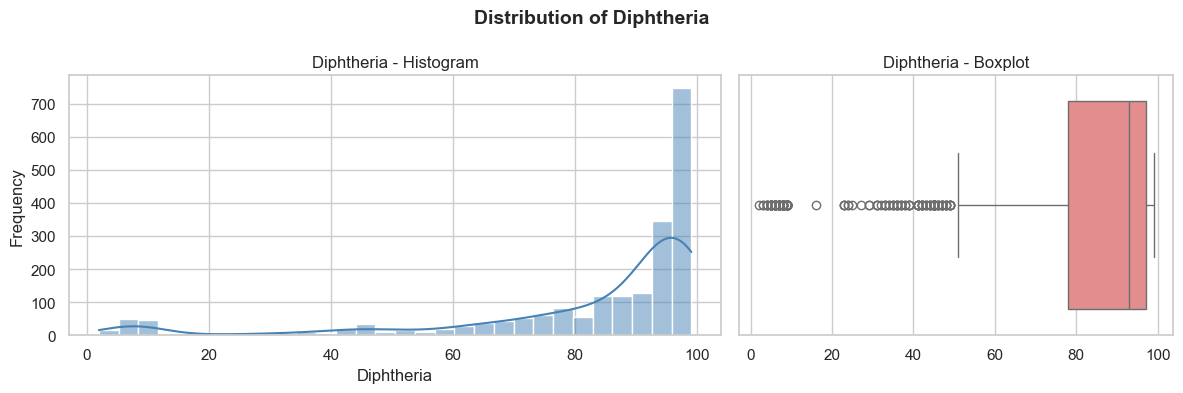

Distribution of Diphtheria
Skewness: -2.09
Kurtosis: 3.74
Number of outliers: 206

Descriptive Statistics for Diphtheria
count    2071.000000
mean       82.753259
std        23.130969
min         2.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Diphtheria, dtype: float64


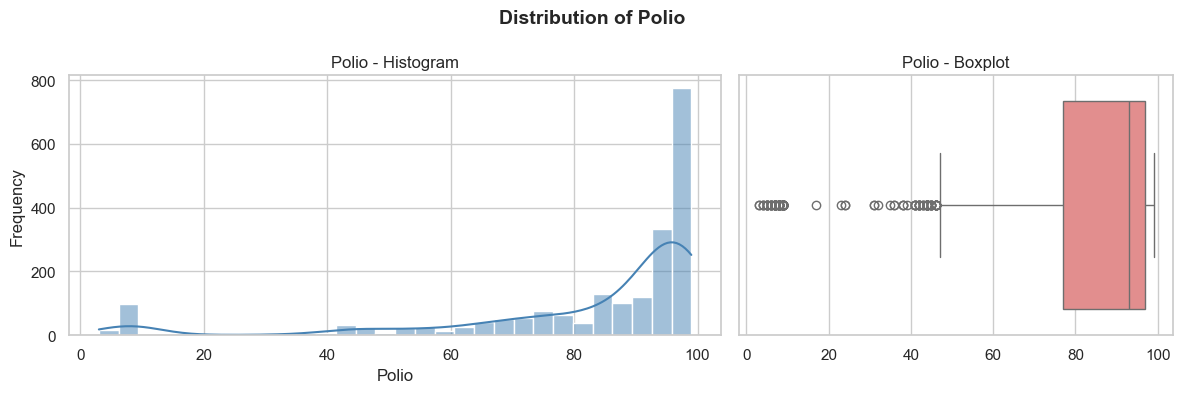

Distribution of Polio
Skewness: -2.07
Kurtosis: 3.69
Number of outliers: 183

Descriptive Statistics for Polio
count    2070.000000
mean       82.720773
std        23.192604
min         3.000000
25%        77.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64


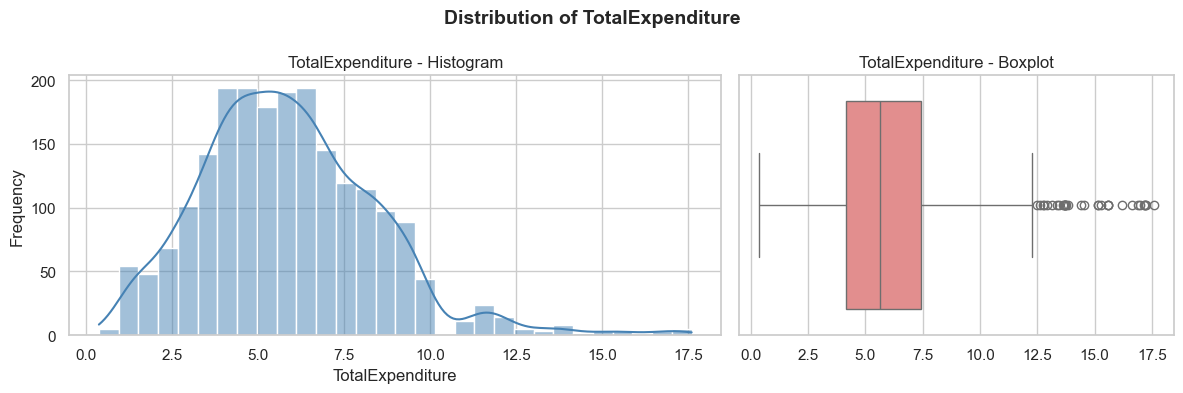

Distribution of TotalExpenditure
Skewness: 0.79
Kurtosis: 1.57
Number of outliers: 33

Descriptive Statistics for TotalExpenditure
count    2061.000000
mean        5.881827
std         2.557347
min         0.370000
25%         4.180000
50%         5.640000
75%         7.430000
max        17.600000
Name: TotalExpenditure, dtype: float64


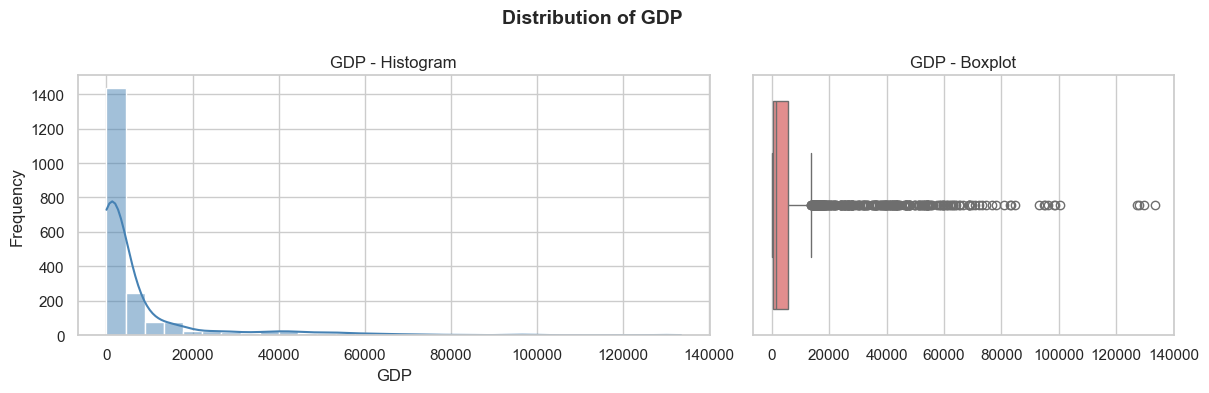

Distribution of GDP
Skewness: 3.61
Kurtosis: 16.05
Number of outliers: 295

Descriptive Statistics for GDP
count      2062.000000
mean       7304.336600
std       15179.036764
min           1.880000
25%         413.730000
50%        1390.315000
75%        5746.287500
max      133473.470000
Name: GDP, dtype: float64


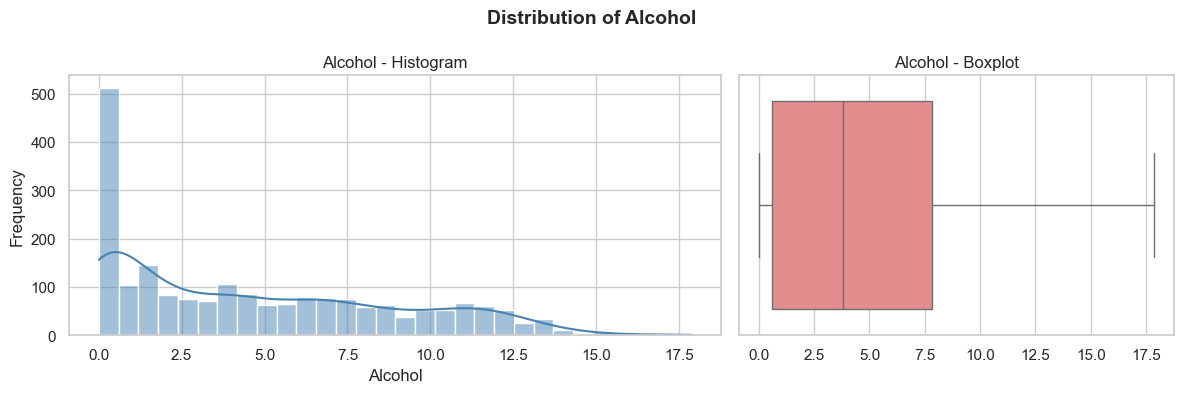

Distribution of Alcohol
Skewness: 0.59
Kurtosis: -0.82
Number of outliers: 0

Descriptive Statistics for Alcohol
count    2067.000000
mean        4.693009
std         4.205270
min         0.010000
25%         0.615000
50%         3.820000
75%         7.840000
max        17.870000
Name: Alcohol, dtype: float64


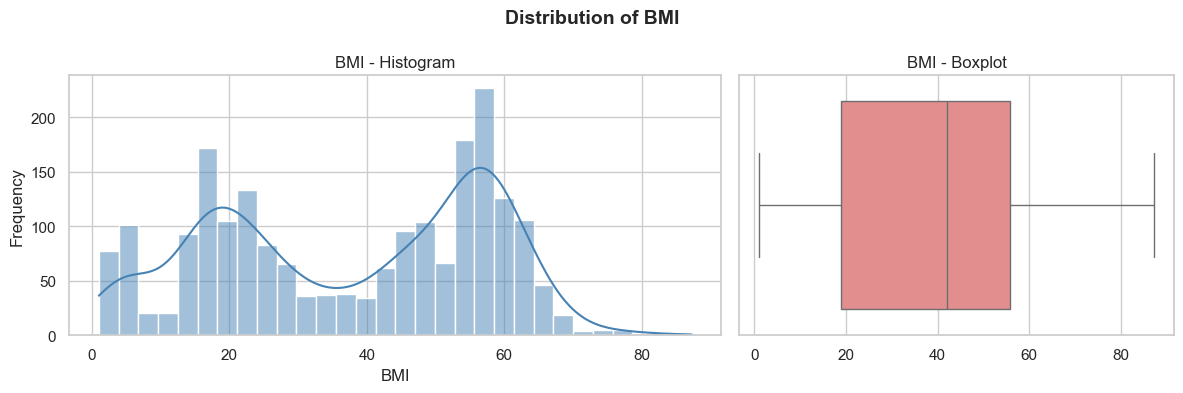

Distribution of BMI
Skewness: -0.18
Kurtosis: -1.34
Number of outliers: 0

Descriptive Statistics for BMI
count    2063.000000
mean       37.572952
std        19.946367
min         1.000000
25%        18.800000
50%        42.100000
75%        55.900000
max        87.300000
Name: BMI, dtype: float64


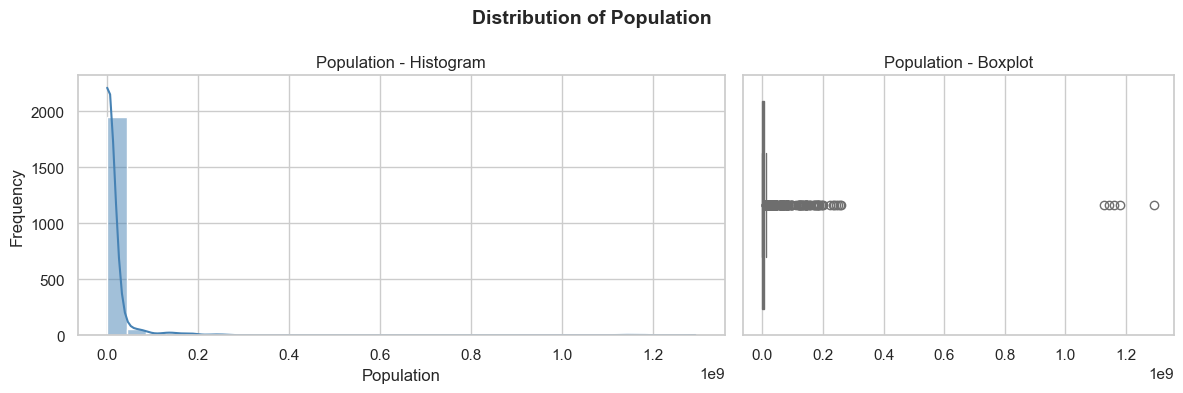

Distribution of Population
Skewness: 15.27
Kurtosis: 271.94
Number of outliers: 286

Descriptive Statistics for Population
count    2.063000e+03
mean     1.205231e+07
std      6.403752e+07
min      3.400000e+01
25%      1.274450e+05
50%      6.477440e+05
75%      5.364814e+06
max      1.293859e+09
Name: Population, dtype: float64


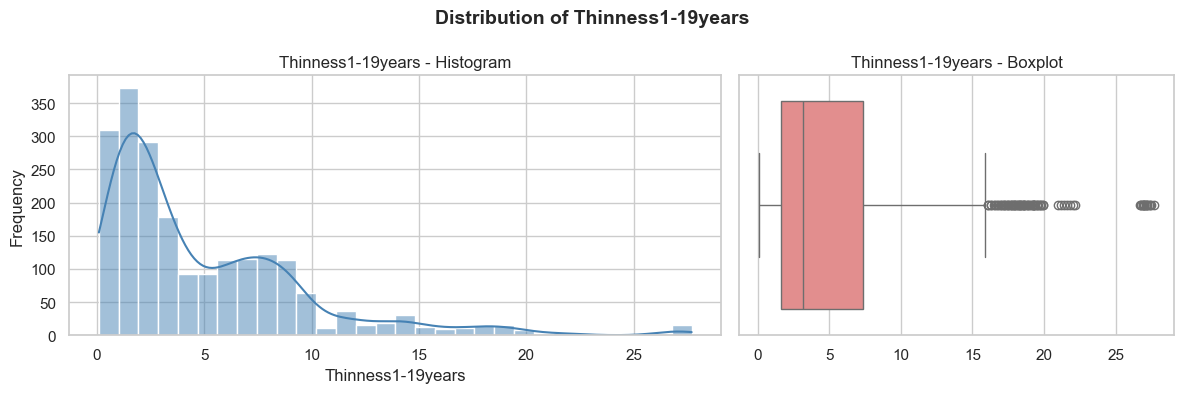

Distribution of Thinness1-19years
Skewness: 1.80
Kurtosis: 4.04
Number of outliers: 79

Descriptive Statistics for Thinness1-19years
count    2070.000000
mean        4.939034
std         4.697848
min         0.100000
25%         1.600000
50%         3.200000
75%         7.375000
max        27.700000
Name: Thinness1-19years, dtype: float64


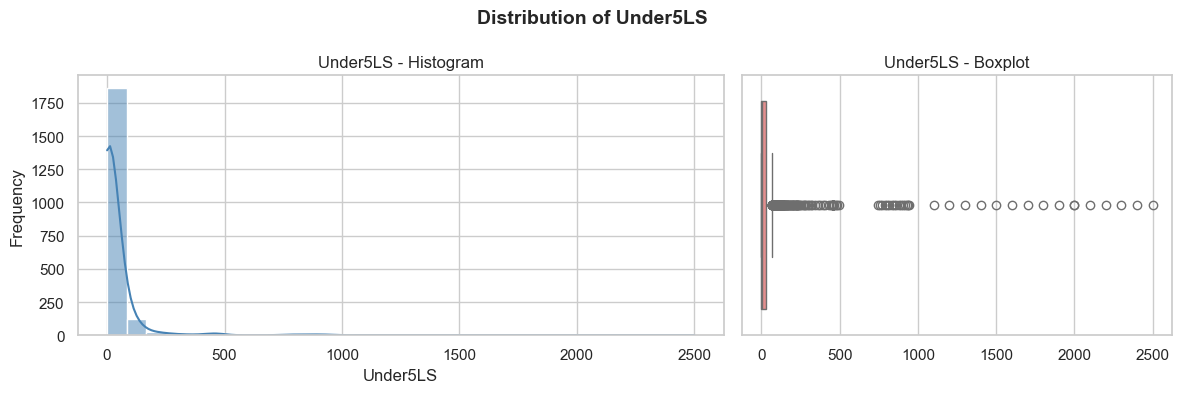

Distribution of Under5LS
Skewness: 8.60
Kurtosis: 85.96
Number of outliers: 240

Descriptive Statistics for Under5LS
count    2070.000000
mean       45.849275
std       185.292194
min         0.000000
25%         0.000000
50%         4.000000
75%        27.000000
max      2500.000000
Name: Under5LS, dtype: float64


In [35]:
# List of relevant columns based on correlation or other criteria
relevant_columns = ['Schooling', 'IncomeCompositionOfResources', 'AdultMortality', 'HIV-AIDS', 'Diphtheria', 'Polio', 'TotalExpenditure', 'GDP', 'Alcohol','BMI','Population','Thinness1-19years','Under5LS']

# Analyze each relevant column
for col in relevant_columns:
    analyze_univariate_feature(df_train, col)
    print("\nDescriptive Statistics for", col)
    print(df_train[col].describe())

Based on the observed distributions, I compiled a summary table that outlines which features show problematic skewness or outliers.





#### <span style="color:pink"> **Right-Skewed Features**</span>

| Feature                  | Skewness Observation         | Outlier Observation (Count, %) | Planned Handling Strategy                                                             |
|--------------------------|------------------------------|----------------------------------|----------------------------------------------------------------------------------------|
| `Population`             | Extremely right-skewed       | 464 (22.40%)                    | Apply log transformation; consider binning or scaling                                 |
| `GDP`                    | Highly right-skewed          | 397 (19.17%)                    | Apply log transformation to reduce skew and compress extreme values                   |
| `HIV-AIDS`               | Very strong right skew       | 341 (16.47%)                    | Log transform and cap values above threshold                                          |
| `AdultMortality`         | Strong right skew            | 276 (13.33%)                    | Apply log transform and outlier capping                                               |
| `Under5LS`              | Strong right skew            | 77 (3.72%)                      | Apply log transform or winsorization if impacting regression assumptions              |
| `Thinness1-19years`      | Moderate right skew          | 74 (3.57%)                      | Apply log or Yeo-Johnson transformation; cap extreme thinness values                  |
| `TotalExpenditure`       | Mild right skew              | 85 (4.10%)                      | Normalize or scale depending on model type                                            |
| `Schooling`              | Moderately right-skewed      | 53 (2.56%)                      | Log transform and mild outlier capping                                                |
| `Alcohol`                | Mild right skew              | 0 (0.00%)                       | No outliers; possible normalization if required by model                              |



#### <span style="color:pink"> **Left-Skewed Features**</span>

| Feature                      | Skewness Observation     | Outlier Observation (Count, %) | Planned Handling Strategy                                                 |
|-----------------------------|--------------------------|----------------------------------|----------------------------------------------------------------------------|
| `IncomeCompositionOfResources` | Mild left skew           | 108 (5.23%)                     | Treat 0s as missing; log transform if model assumptions require it        |
| `Diphtheria`                | Slight left skew         | 43 (2.08%)                      | Retain as-is; optional normalization                                      |
| `Polio`                     | Slight left skew         | 25 (1.21%)                      | No transformation needed; distribution is compact                         |


#### <span style="color:pink"> **Approximately Normal**</span>

| Feature   | Skewness Observation     | Outlier Observation (Count, %) | Planned Handling Strategy                           |
|-----------|--------------------------|----------------------------------|------------------------------------------------------|
| `BMI`     | Approximately normal     | 0 (0.00%)                       | Keep as-is; optional scaling if model requires it    |


#### <span> 3.1.2 Categorical Data</span>


To understand the class distribution of the `Status` column, I plotted a countplot. This shows the number of observations for each category: **Developed (1)** and **Developing (0)** countries.



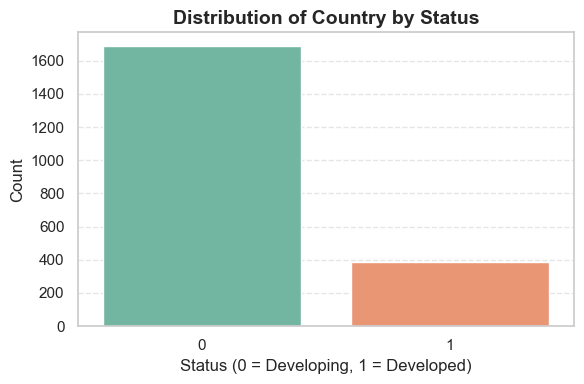

Status
0    81.46
1    18.54
Name: proportion, dtype: float64


In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', hue='Status', data=df_train, palette='Set2', legend=False)
plt.title("Distribution of Country by Status", fontsize=14, fontweight='bold')
plt.xlabel("Status (0 = Developing, 1 = Developed)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print proportions
status_counts = df_train['Status'].value_counts(normalize=True) * 100
print(status_counts.round(2))


> <span style="font-weight:bold">Observation:</span>  
> The dataset is heavily imbalanced — **Developing countries dominate** the dataset.  
> Specifically, around **81%** of the rows are developing, and only **19%** are developed.

### <span style="font-style:italic"> 3.2 Bivariate Analysis </span>
This section explores relationships between pairs of variables, focusing on how features relate to the target variable and to each other. This helps uncover patterns, trends, and dependencies that guide feature selection and modeling decisions.

#### <span> 3.2.1 Temporal Trends by Country Status </span>

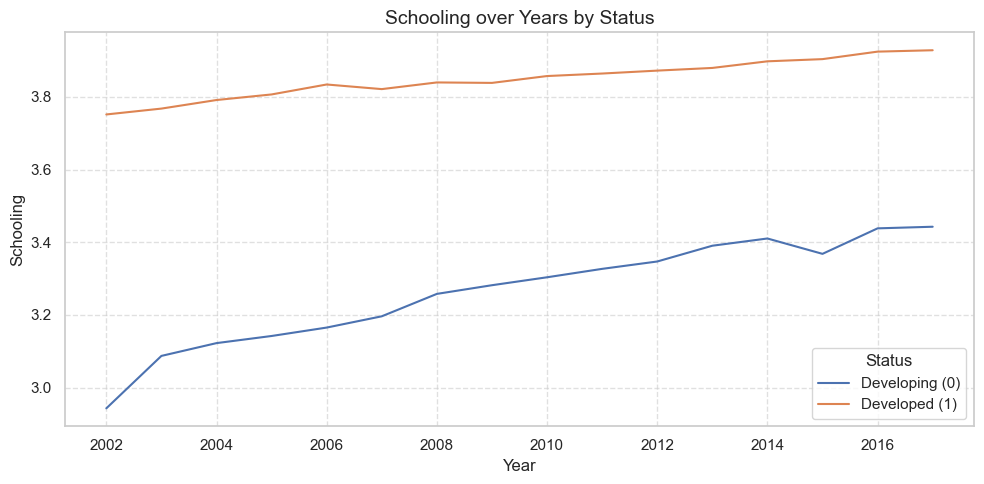

In [37]:
plot_feature_over_years_by_status(df_train, "Schooling")

**Developing countries** gradually increase from **~2.9 years** in 2002 onward. They also begin low at **~3.7 years** in 2002 and stay slightly higher, but the values remain suspiciously low for both, suggesting **possible data limitations** or underreporting.

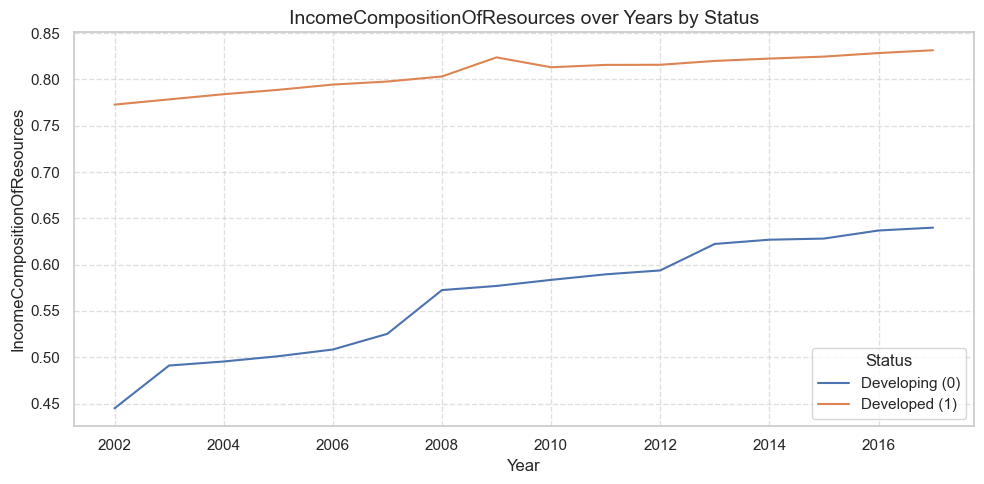

In [38]:
plot_feature_over_years_by_status(df_train, "IncomeCompositionOfResources")


**Developed countries** maintain a **high and stable index** around **0.77–0.78**. They rise from a lower baseline of **~0.44 in 2002**, with a gradual improvement over time.

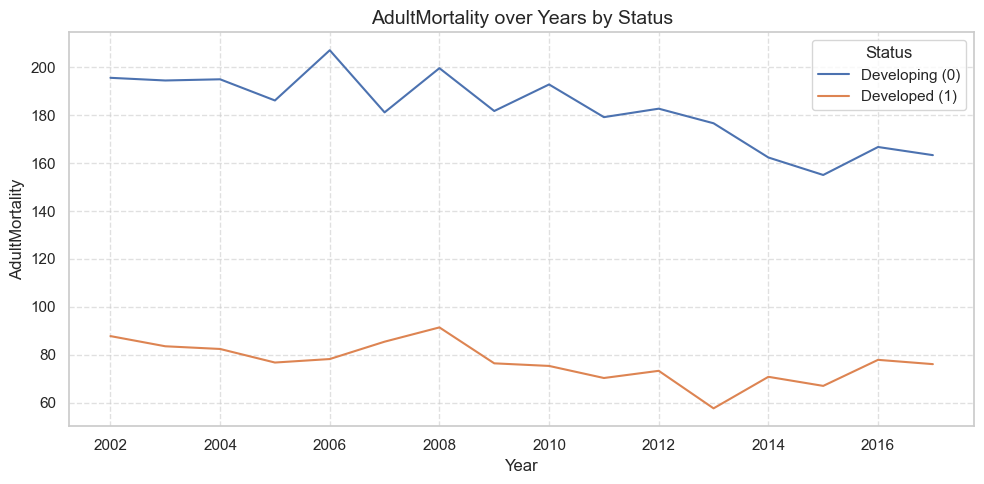

In [39]:
plot_feature_over_years_by_status(df_train, "AdultMortality")

Adult mortality shows a **downward trend** for both groups.  
- **Developing countries** begin around **~195 deaths per 1,000 adults** in 2002 and steadily improve.  
- **Developed countries** start lower at **~88** and continue decreasing, reflecting better healthcare outcomes.

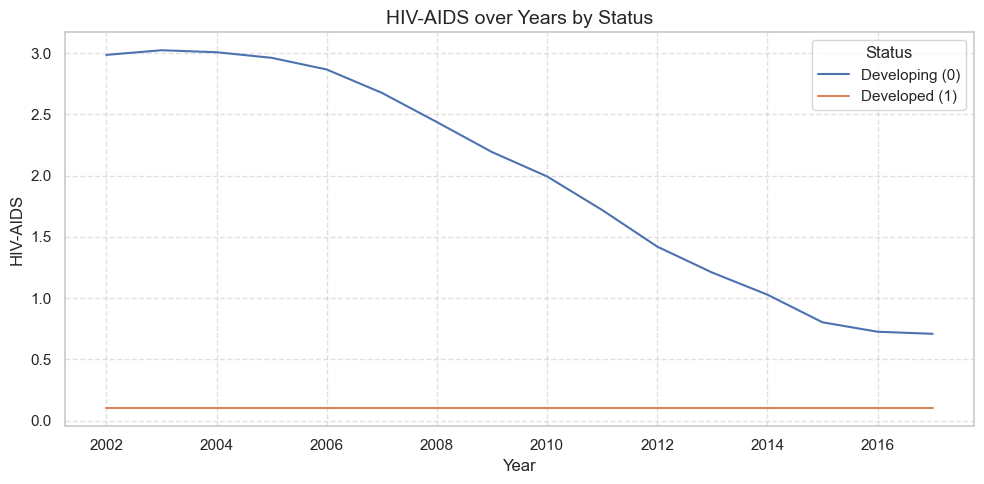

In [40]:
plot_feature_over_years_by_status(df_train, "HIV-AIDS")

**Developed countries** consistently show **very low levels (~0.1%)** throughout the years. They start higher at **~2.99% in 2002**, but steadily decline, indicating progress in disease control.

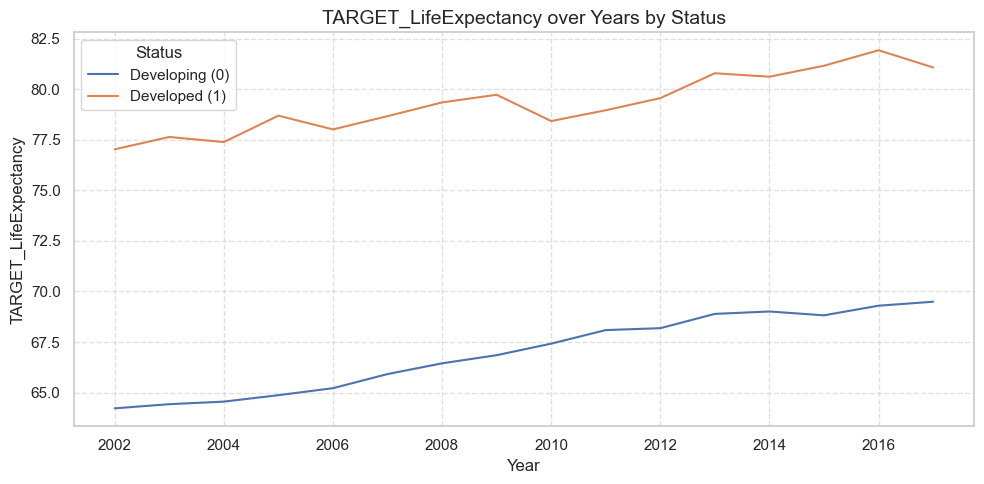

In [41]:
plot_feature_over_years_by_status(df_train, "TARGET_LifeExpectancy")

From **2002 onward**, both country groups exhibit a steady rise in life expectancy.  
- **Developing countries** improve gradually from **~64.2 years** in 2002 to over **70 years** by 2015.  
- **Developed countries** consistently report higher levels, starting around **~77 years** in 2002 and reaching above **80 years** by 2015.

> **Note:** This trend analysis is based purely on visualized aggregated data and does not imply any causal relationships or underlying mechanisms.

#### <span> 3.2.2 Further Observation </span>

The following observations are derived from LOWESS plots that capture **non-linear relationships** between selected features and `Life Expectancy`. These trends help reveal critical behaviors that may not be detected using correlation coefficients alone.


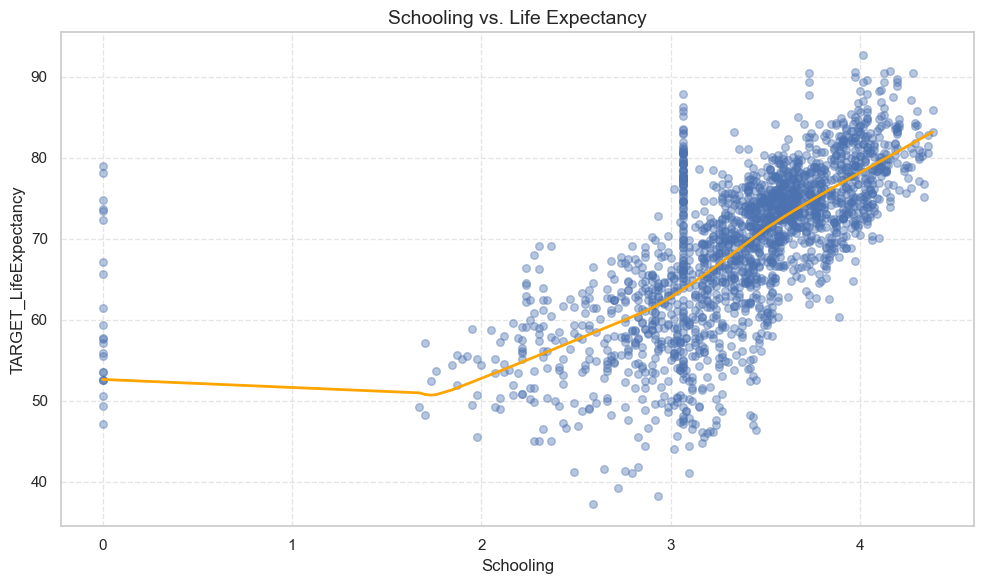

In [42]:
plot_lowess_relationship(df_train, "Schooling", "TARGET_LifeExpectancy", title="Schooling vs. Life Expectancy")

The LOWESS plot reveals a **positive nonlinear trend** between `Schooling` and life expectancy. Life expectancy rises consistently as average years of schooling increase from around **3 to 13 years**. However, the rate of increase is steeper at lower levels of education and plateaus slightly beyond **12 years**, suggesting diminishing marginal returns in higher-education countries.

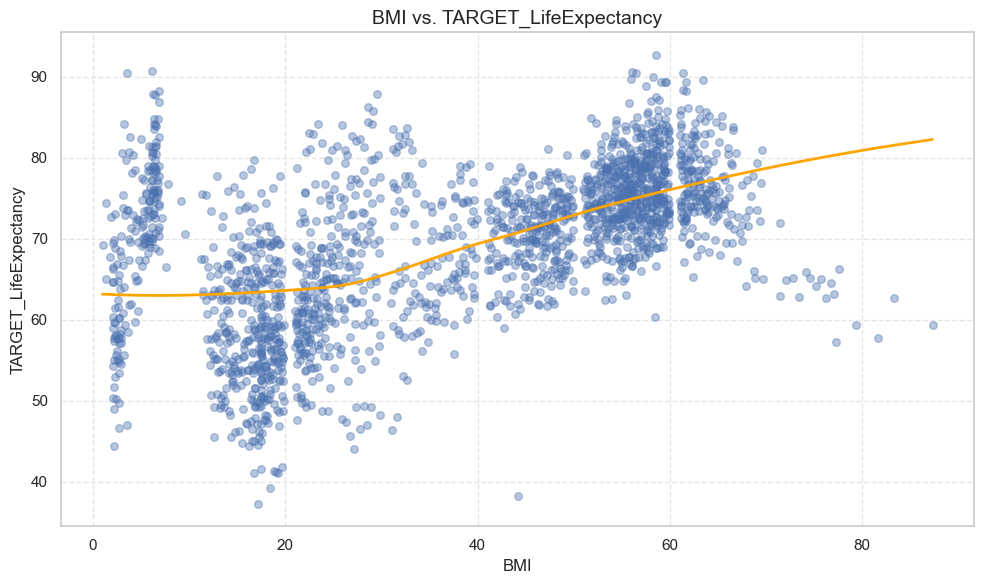

In [43]:
plot_lowess_relationship(df_train, "BMI", "TARGET_LifeExpectancy")


The relationship between `BMI` and life expectancy follows a **mild upward curve** from **low BMI values (~10–20)** to a moderate range of **20–28**, where life expectancy peaks. Beyond that, the curve flattens or even slightly declines, implying that **extremely high BMI** might be linked to declining health outcomes, but this trend is less pronounced.


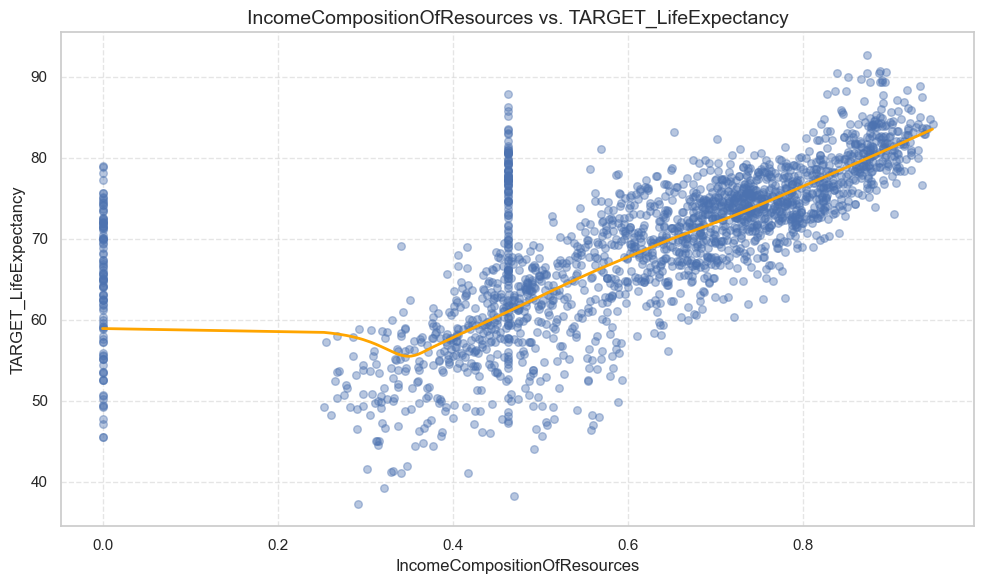

In [44]:
plot_lowess_relationship(df_train, "IncomeCompositionOfResources", "TARGET_LifeExpectancy")

There is a **strong and steadily increasing relationship** between `IncomeCompositionOfResources` and life expectancy. As the income index increases from around 0.4 to above 0.9, life expectancy also rises sharply, particularly between the range of **0.6 to 0.85**. This trend aligns with expectations, since this feature reflects access to income and essential services that directly influence health outcomes.

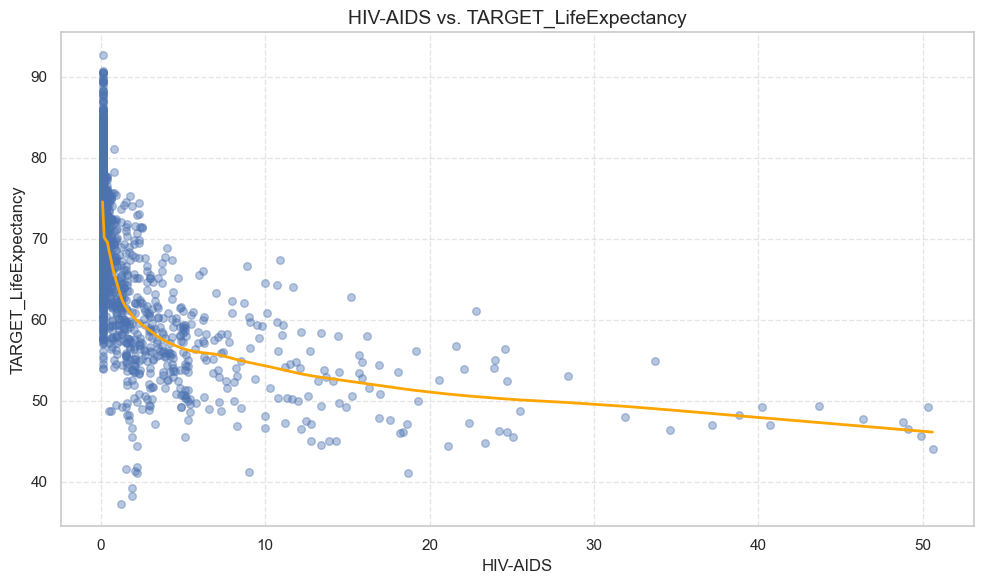

In [45]:
plot_lowess_relationship(df_train, "HIV-AIDS", "TARGET_LifeExpectancy")

**HIV-AIDS** exhibits a steep **inverse curve**. Life expectancy sharply decreases as HIV prevalence rises above **2%**, with a particularly steep drop between **0% to 4%**. Beyond this point, the curve flattens at a low life expectancy baseline, reflecting the serious health burden of high HIV rates.

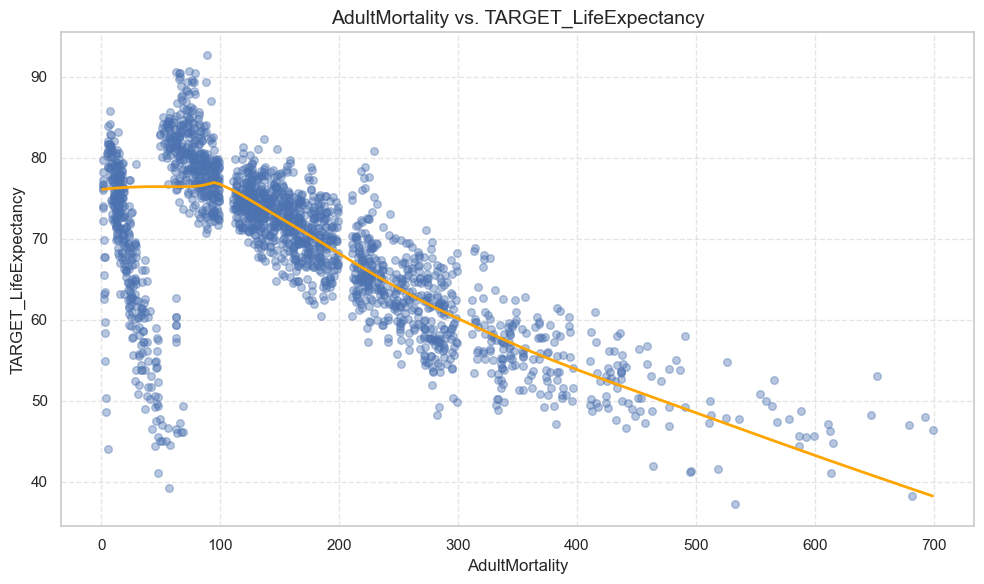

In [46]:
plot_lowess_relationship(df_train, "AdultMortality", "TARGET_LifeExpectancy")

**AdultMortality** shows a clear **negative non-linear relationship** with life expectancy. As mortality increases from **100 to above 300**, life expectancy steadily declines, with the sharpest drop observed in the **100–200** range. This trend confirms that higher adult death rates are strongly associated with lower overall life expectancy.